In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PFNExperiments.LinearRegression.GenerativeModels.Curriculum import Curriculum
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataCurriculumCFM import GenerateDataCurriculumCFM
from PFNExperiments.LinearRegression.Models.Transformer_CNF import TransformerCNFConditionalDecoder
from PFNExperiments.Training.FlowMatching.CFMLossOT2 import CFMLossOT2
from PFNExperiments.LatentFactorModels.Training.TrainerCurriculumCNF_LatentFactor import TrainerCurriculumCNF_LatentFactor
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
from PFNExperiments.LinearRegression.Models.ModelToPosteriorCNF import ModelToPosteriorCNF
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC_Numpyro import Hamiltionian_MC
from PFNExperiments.Evaluation.Evaluate import Evaluate, results_dict_to_data_x_tuple, result_dict_to_latent_variable_convert_mu_sigma_to_beta, results_dict_to_data_x_tuple_transpose, result_dict_to_latent_variable_convert_z_to_beta

In [3]:
from PFNExperiments.LatentFactorModels.GenerativeModels.FactorAnalysis.BasicFA import make_fa_program_normal_weight_prior_laplace_z_prior_batched, make_fa_program_normal_weight_prior_laplace_z_prior
from PFNExperiments.LatentFactorModels.GenerativeModels.LatenFactorModel_abstract import return_only_x

from PFNExperiments.LatentFactorModels.ComparisonModels.MakeDefaultListComparison import make_default_list_comparison, make_reduced_list_comparison


In [4]:
N = 200
P = 5
K = 3
BATCH_SIZE = 4
N_EPOCHS = 1
N_SAMPLES_PER_EPOCH = 100
N_BATCHES_PER_EPOCH = N_SAMPLES_PER_EPOCH//BATCH_SIZE

In [5]:
curriculum = Curriculum(max_iter=int(N_EPOCHS*N_BATCHES_PER_EPOCH*BATCH_SIZE*0.5))
curriculum.add_param_list([
    ("n", curriculum.constant_scheduler(N)),
    ("p", curriculum.constant_scheduler(5)),
    ("batch_size", curriculum.constant_scheduler(BATCH_SIZE)),
    ("z_dim", curriculum.constant_scheduler(3)),
    ("w_var", curriculum.constant_scheduler(1.0)),
    ("mu_var", curriculum.constant_scheduler(1.0)),
    ("a1_psi_var", curriculum.constant_scheduler(5.0)),
    ("b1_psi_var", curriculum.constant_scheduler(2.0)),
])
#curriculum.plot_all_schedules()

In [6]:
data_generator = GenerateDataCurriculumCFM(
    pprogram_maker= make_fa_program_normal_weight_prior_laplace_z_prior_batched,
    curriculum= curriculum,
)

pprogram_covariates_train is None, using pprogram_covariates instead
pprogram_covariates_val is None, using pprogram_covariates instead
pprogram_covariates_test is None, using pprogram_covariates instead


In [7]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 100
    )

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 100 and 50 respectively


In [8]:
sample_batch = next(iter(epoch_loader[0][0]))

In [9]:
for key, value in sample_batch.items():
    print(key, value.shape)

x torch.Size([4, 200, 5])
z torch.Size([4, 3])
mu torch.Size([4, 5])
w torch.Size([4, 12])
psi torch.Size([4, 5])
beta torch.Size([4, 3])
time torch.Size([4])
base_sample_beta torch.Size([4, 3])


####################################################################################################
Epoch 0


100%|██████████| 10/10 [00:03<00:00,  3.26it/s]


{'X': {'mean': tensor(-0.0613), 'variance': tensor(5.8511), 'min': tensor(-14.4931), 'max': tensor(15.6738), 'mean_mean': tensor([-0.0967, -0.0036, -0.0952, -0.0825, -0.0287]), 'variance_mean': tensor([0.4906, 0.5002, 0.5066, 0.4940, 0.4938]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(-0.0104), 'variance': tensor(1.9238), 'min': tensor(-8.6624), 'max': tensor(6.3680), 'mean_mean': tensor(-0.0104), 'variance_mean': tensor(1.8861), 'min_mean': None, 'max_mean': None}}
Statistics for z:
Mean: tensor([-0.0274, -0.0243,  0.0205])
Variance: tensor([1.8676, 1.9322, 1.9715])
Min: tensor([-5.8572, -8.6624, -7.8422])
Max: tensor([6.3680, 5.4129, 5.2066])
Mean of means: -0.01041655708104372
Mean of variances: 1.8860944509506226
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([-0.0520,  0.0142,  0.0038, -0.0289,  0.0134])
Variance: tensor([0.9336, 1.0109, 0.9774, 0.9704, 1.0656])
Min: tensor([-2.8341, -2.9440, -2.8440, -2.8846, -3.1278])
Max: tens

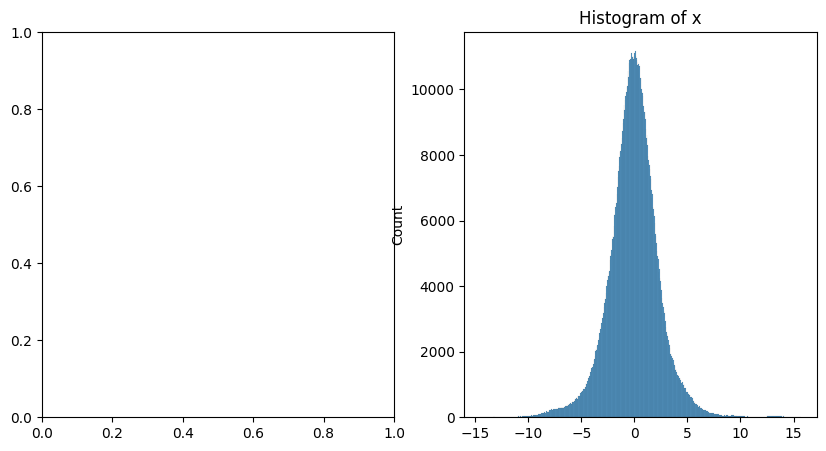

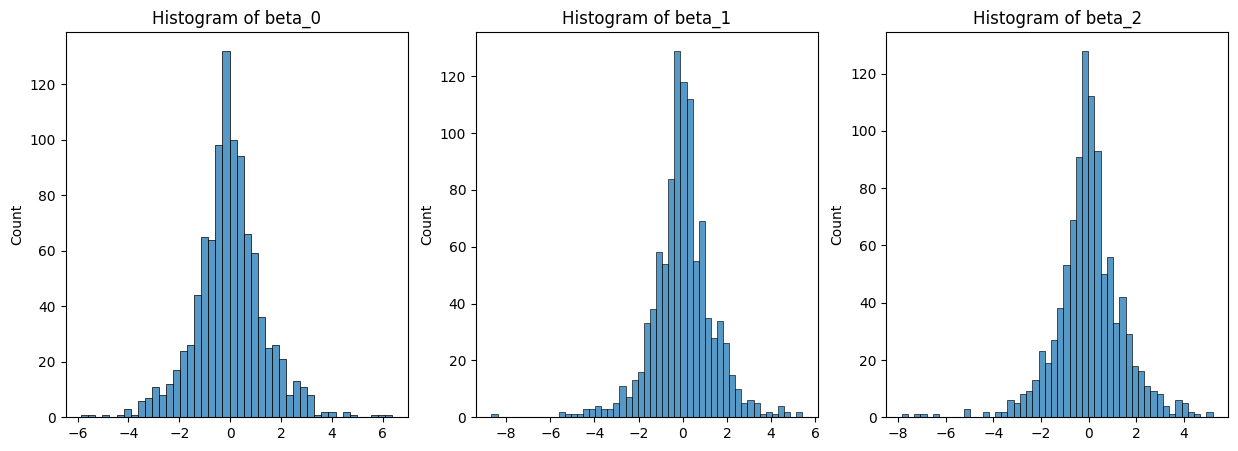

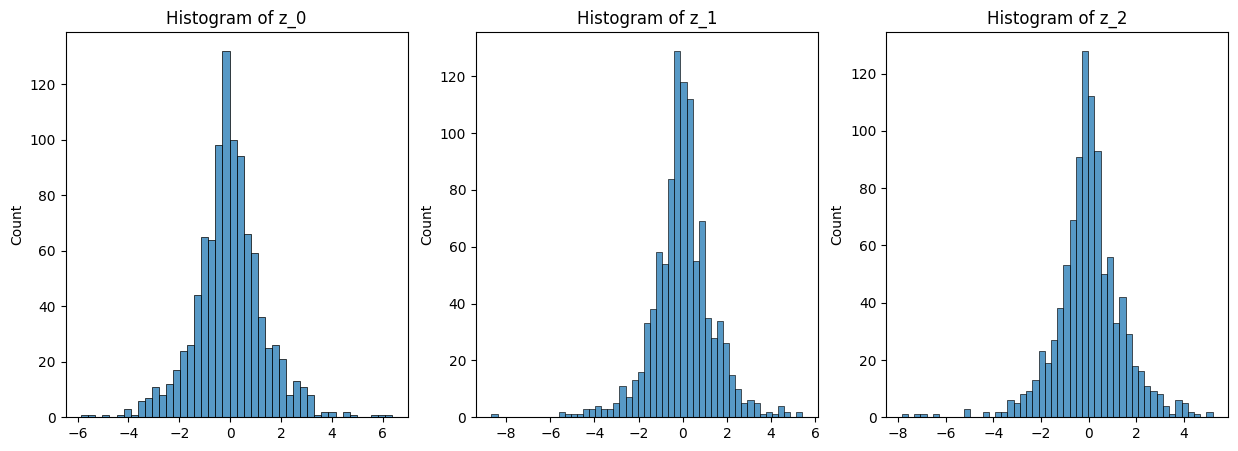

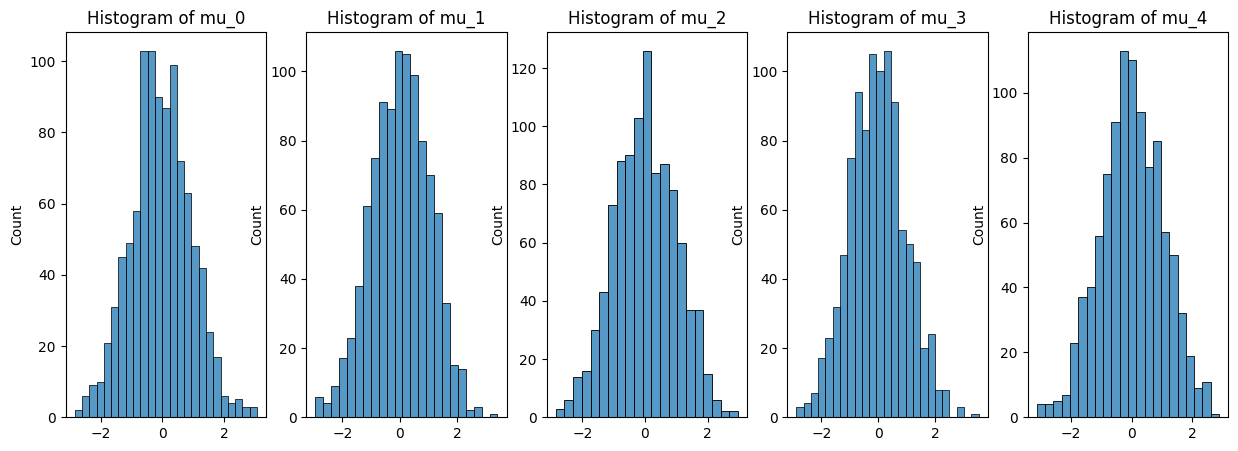

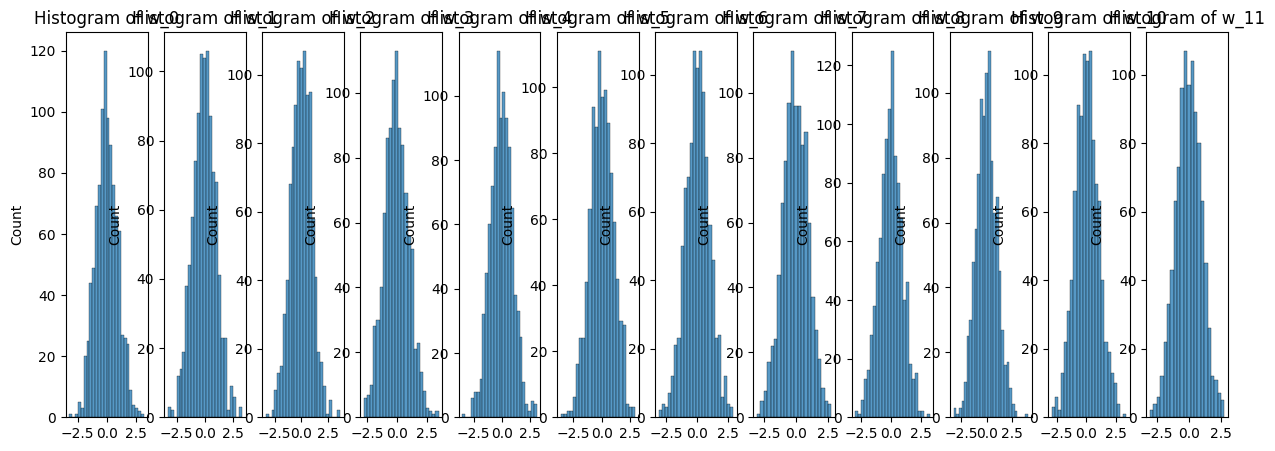

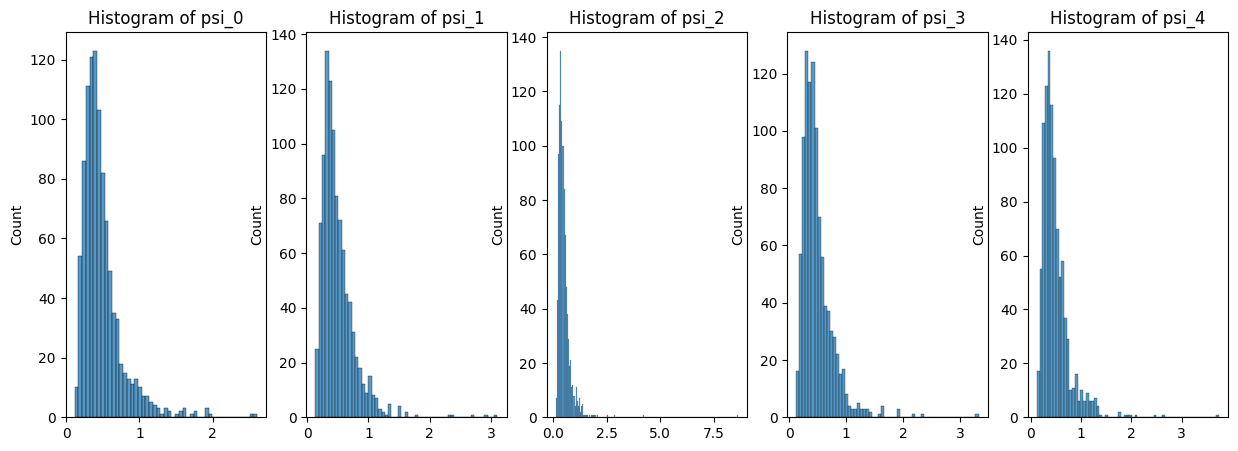

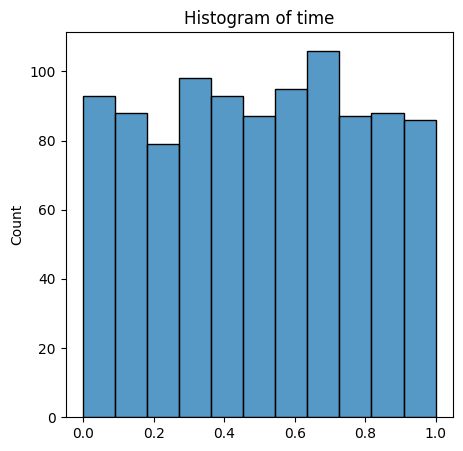

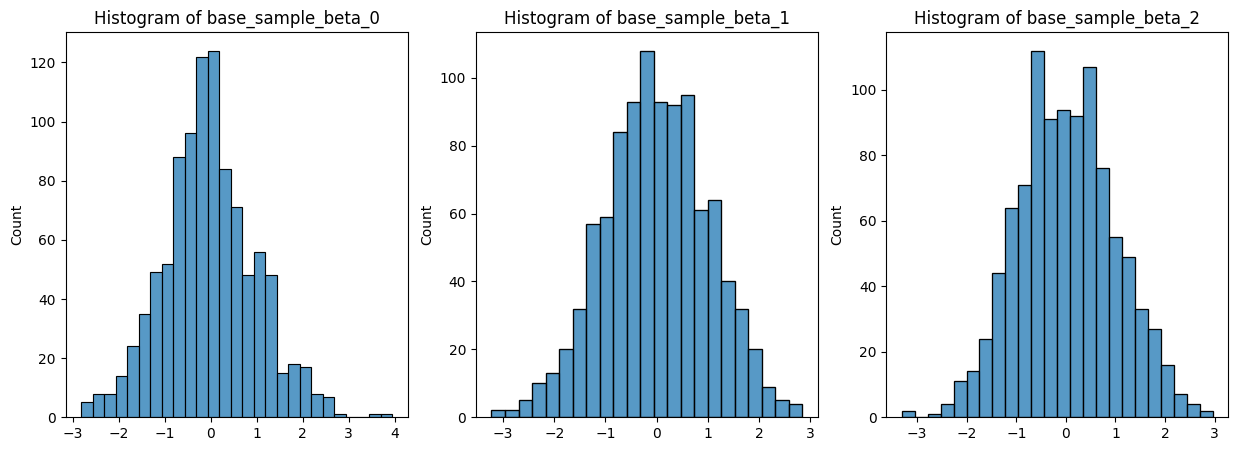

####################################################################################################
Epoch 0


100%|██████████| 10/10 [00:03<00:00,  3.14it/s]


{'X': {'mean': tensor(-0.0278), 'variance': tensor(6.6663), 'min': tensor(-16.0489), 'max': tensor(19.0586), 'mean_mean': tensor([-0.0272,  0.0548, -0.0532, -0.0887, -0.0246]), 'variance_mean': tensor([0.5006, 0.5004, 0.4780, 0.5162, 0.4926]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(-0.0036), 'variance': tensor(2.1025), 'min': tensor(-7.2262), 'max': tensor(7.8615), 'mean_mean': tensor(-0.0036), 'variance_mean': tensor(2.1212), 'min_mean': None, 'max_mean': None}}
Statistics for z:
Mean: tensor([-0.0343,  0.0148,  0.0087])
Variance: tensor([2.3360, 1.7888, 2.1828])
Min: tensor([-6.8822, -4.4980, -7.2262])
Max: tensor([5.6927, 7.8615, 7.4571])
Mean of means: -0.003617474576458335
Mean of variances: 2.1212143898010254
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([ 0.0420,  0.0146, -0.0380,  0.0037, -0.0043])
Variance: tensor([1.0228, 1.0441, 1.0364, 1.0108, 1.0235])
Min: tensor([-2.8665, -3.2567, -3.1351, -3.6832, -3.3225])
Max: ten

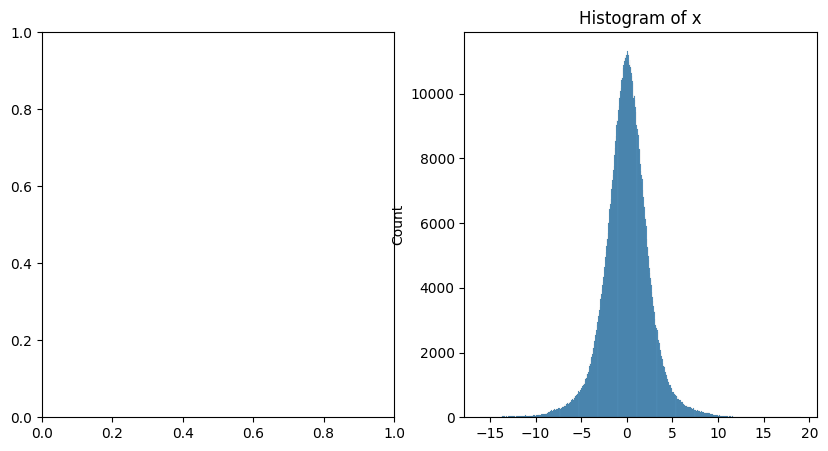

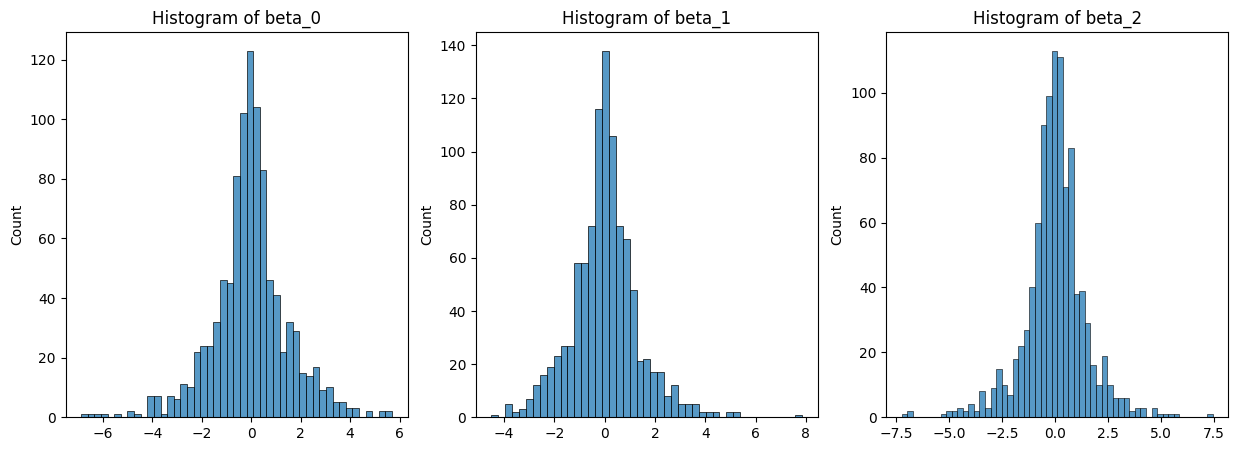

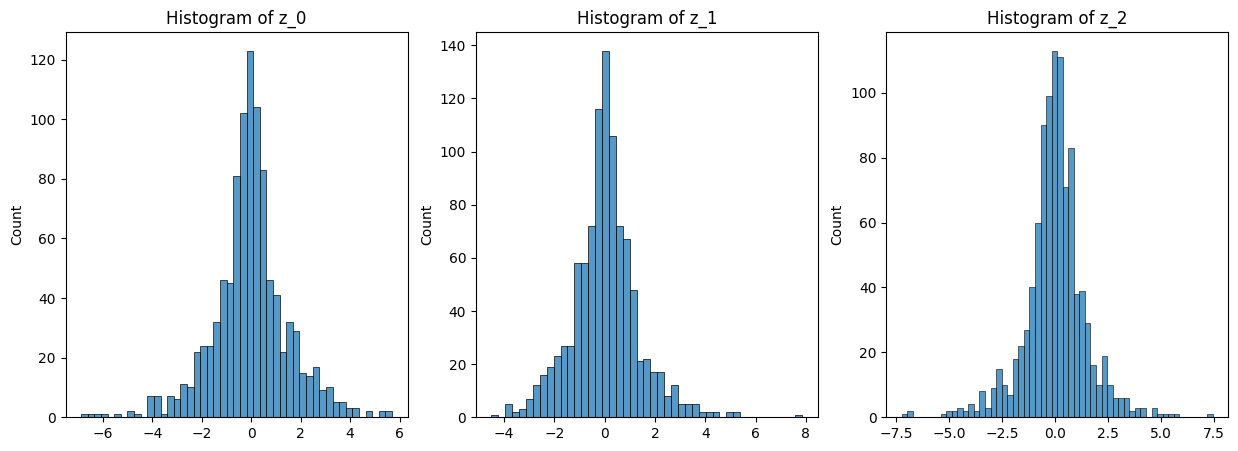

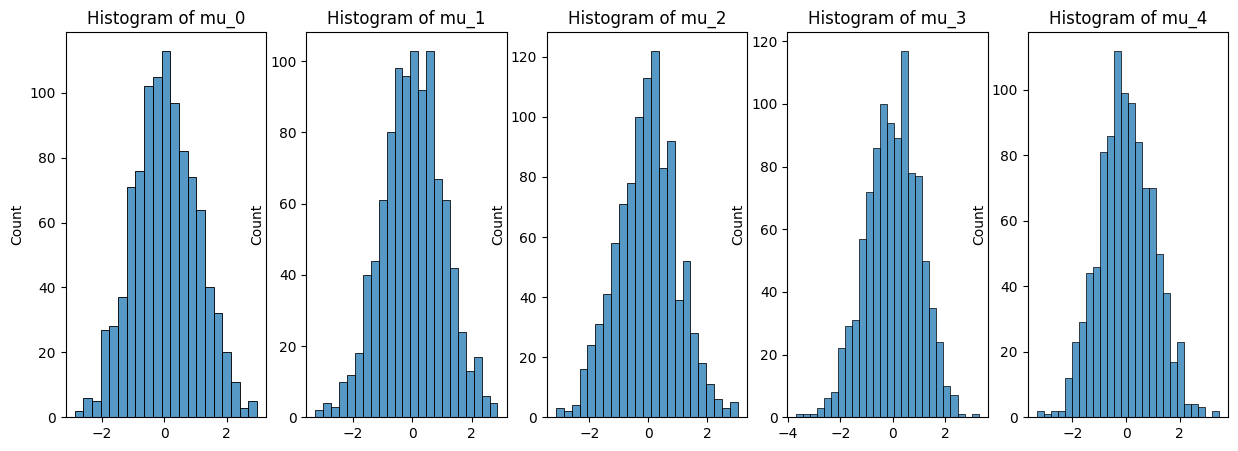

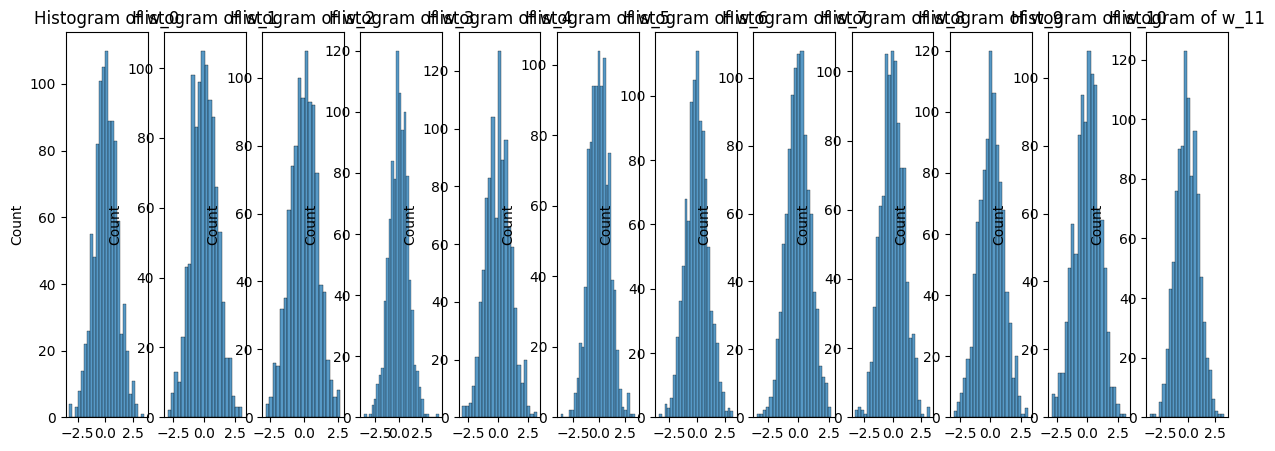

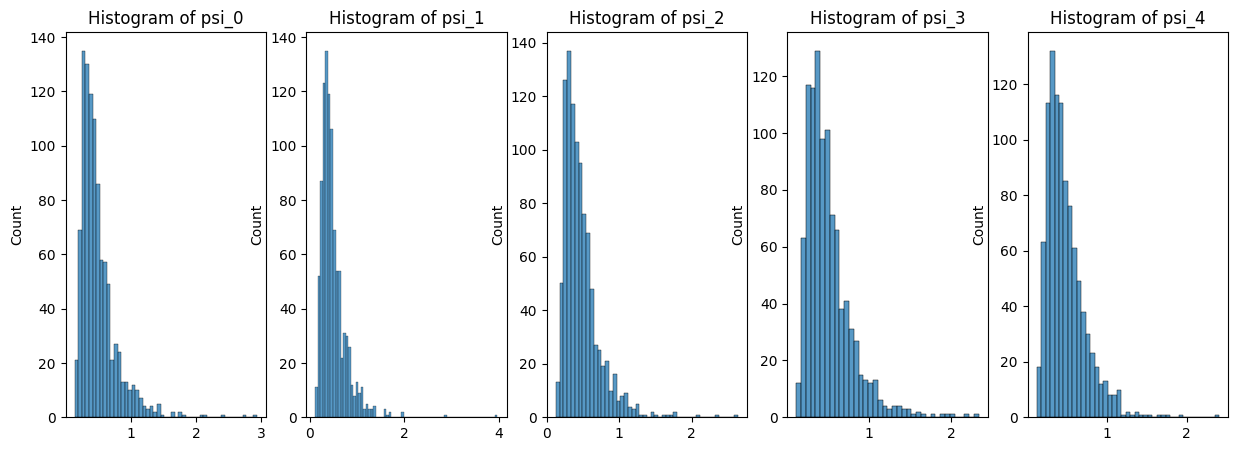

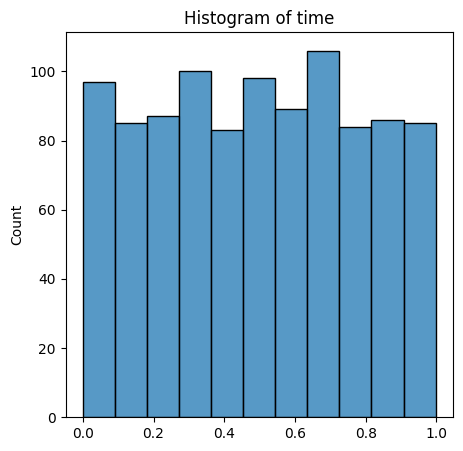

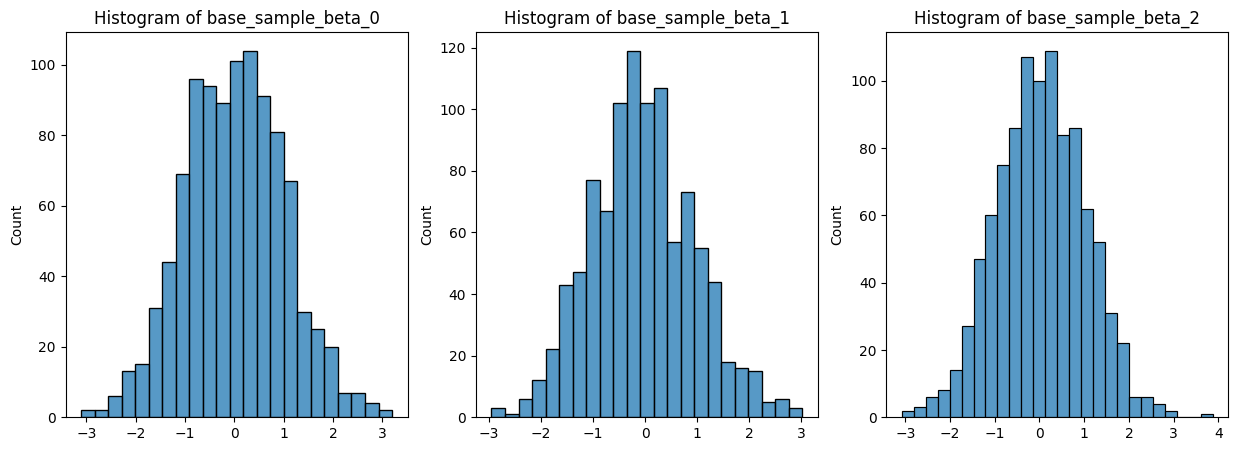

[{'X': {'mean': tensor(-0.0613),
   'variance': tensor(5.8511),
   'min': tensor(-14.4931),
   'max': tensor(15.6738),
   'mean_mean': tensor([-0.0967, -0.0036, -0.0952, -0.0825, -0.0287]),
   'variance_mean': tensor([0.4906, 0.5002, 0.5066, 0.4940, 0.4938]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(-0.0104),
   'variance': tensor(1.9238),
   'min': tensor(-8.6624),
   'max': tensor(6.3680),
   'mean_mean': tensor(-0.0104),
   'variance_mean': tensor(1.8861),
   'min_mean': None,
   'max_mean': None}},
 {'X': {'mean': tensor(-0.0278),
   'variance': tensor(6.6663),
   'min': tensor(-16.0489),
   'max': tensor(19.0586),
   'mean_mean': tensor([-0.0272,  0.0548, -0.0532, -0.0887, -0.0246]),
   'variance_mean': tensor([0.5006, 0.5004, 0.4780, 0.5162, 0.4926]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(-0.0036),
   'variance': tensor(2.1025),
   'min': tensor(-7.2262),
   'max': tensor(7.8615),
   'mean_mean': tensor(-0.0036),
   'vari

In [10]:
data_generator.check_model(
    n_samples_per_epoch=N_SAMPLES_PER_EPOCH,
    epochs_to_check = [0, N_EPOCHS-1],
    p = P,
    n = N,
    used_batch_samples = 10
)

In [11]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 100
)

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 100 and 50 respectively


In [12]:
sample_batch = next(iter(epoch_loader[0][0]))
sample_batch.keys()

dict_keys(['x', 'z', 'mu', 'w', 'psi', 'beta', 'time', 'base_sample_beta'])

In [13]:
sample_batch["x"].shape, sample_batch["beta"].shape

(torch.Size([4, 200, 5]), torch.Size([4, 3]))

In [14]:
2*K

6

In [15]:
"""
model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = 1,
    n_input_features_decoder = 2*P,
    d_model_encoder = 512,
    d_model_decoder = 512,
    n_heads_encoder = 8,
    n_heads_decoder = 8,
    d_ff_encoder = 1024,
    d_ff_decoder = 1024,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 512,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P,
    d_final_processing = 512,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)
"""

model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = P,
    n_input_features_decoder = K,
    d_model_encoder = 16,
    d_model_decoder = 16,
    n_heads_encoder = 1,
    n_heads_decoder = 1,
    d_ff_encoder = 16,
    d_ff_decoder = 16,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 16,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = K,
    d_final_processing = 16,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)

In [16]:
loss_fun = CFMLossOT2(
    sigma_min=1e-4
)

In [17]:
opt = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = OneCycleLR(opt,
                       max_lr = 5e-4,
                       epochs = N_EPOCHS,
                       steps_per_epoch = N_SAMPLES_PER_EPOCH//BATCH_SIZE,
                       pct_start = 0.1,
                       div_factor=25.0,
                       final_div_factor=1e4)

#scheduler = ReduceLROnPlateau(opt)

additional_evals = {
}



In [18]:
trainer = TrainerCurriculumCNF_LatentFactor(
    model = model,
    optimizer=opt,
    scheduler = scheduler,
    loss_function=loss_fun,
    epoch_loader = epoch_loader,
    evaluation_functions= additional_evals,
    n_epochs = N_EPOCHS,
    early_stopping_patience = 200,
    schedule_step_on = "batch",
    save_path = None,
    coupling = None,
    use_same_timestep_per_batch = False,
    use_train_mode_during_validation = False,
    max_gradient_norm = 1.0

)

In [19]:
trainer.validate()

100%|██████████| 3/3 [00:00<00:00, 21.52it/s]


{'loss_mean': 3.1673030853271484,
 'loss_median': 2.7922093868255615,
 'loss_std': 0.8808404803276062}

In [20]:
r = trainer.train()

Curriculum parameters: {'n': 200, 'p': 5, 'batch_size': 4, 'z_dim': 3, 'w_var': 1.0, 'mu_var': 1.0, 'a1_psi_var': 5.0, 'b1_psi_var': 2.0} at iteration 0


100%|██████████| 3/3 [00:00<00:00, 13.55it/s]


Epoch 0:
Training: {'loss_mean': 4.0048723220825195, 'loss_median': 3.62740421295166, 'loss_std': 1.5857250690460205}
Validation: {'loss_mean': 3.2696754932403564, 'loss_median': 2.7331011295318604, 'loss_std': 2.445730209350586}
Validation curriculum: {'loss_mean': 1.792323112487793, 'loss_median': 1.9566607475280762, 'loss_std': 1.3833060264587402}
Time: 1.9730377197265625
Learning rate: [0.00024127616072387153]


----------------------------------------------------------------------------------------------------
Saving model


100%|██████████| 10/10 [00:00<00:00, 23.21it/s]

Test: {'loss_mean': 2.900057315826416, 'loss_median': 1.8603917360305786, 'loss_std': 1.82547128200531}


In [21]:
full_model = ModelToPosteriorCNF(
    model = model.eval(),
    sample_name = "beta",
    sample_shape = (K,),
    n_samples=1000,
    batch_size = BATCH_SIZE,
    solve_adjoint = True,
    atol = 10,
    rtol = 10,
    #device = torch.device("cpu")
)

benchmark_params_ppgrogram = data_generator.curriculum.get_params(-1)
del benchmark_params_ppgrogram["batch_size"]
print(f"params for pprogram: {benchmark_params_ppgrogram}")

pprogram1 = make_fa_program_normal_weight_prior_laplace_z_prior(**benchmark_params_ppgrogram)

pprogram1_x = return_only_x(pprogram1)



params for pprogram: {'n': 200, 'p': 5, 'z_dim': 3, 'w_var': 1.0, 'mu_var': 1.0, 'a1_psi_var': 5.0, 'b1_psi_var': 2.0}


In [22]:
pprogram1()

{'x': tensor([[-2.1796e-01, -3.5155e+00,  1.9328e+00,  5.7726e+00,  2.0764e+00],
         [-1.5497e-01, -3.6654e+00,  1.5745e+00,  7.2829e+00,  1.1371e+00],
         [ 1.1043e-01, -2.3051e+00,  2.3316e+00,  7.0366e+00,  1.6056e+00],
         [ 2.8336e-01, -3.3948e+00,  2.0911e+00,  5.2210e+00,  1.4239e+00],
         [ 4.2620e-01, -1.4948e+00,  1.8883e+00,  6.6292e+00,  1.1149e+00],
         [ 7.6752e-01, -4.5373e+00,  1.6117e+00,  5.4731e+00,  1.2892e+00],
         [ 5.7041e-01, -2.3942e+00,  2.4486e+00,  5.9799e+00,  6.9376e-01],
         [ 1.2702e+00, -3.2284e+00,  1.3157e+00,  6.5386e+00,  1.7986e+00],
         [-6.5220e-01, -3.5594e+00,  1.1551e+00,  6.2084e+00,  1.4819e+00],
         [ 1.4794e+00, -2.4339e+00,  2.2356e+00,  4.8595e+00,  2.1632e+00],
         [ 1.1446e+00, -2.8443e+00,  2.5148e+00,  6.7185e+00,  1.4632e+00],
         [ 1.9743e-01, -3.0522e+00,  2.5632e+00,  6.4431e+00,  1.0479e+00],
         [ 8.6970e-01, -4.0253e+00,  1.3261e+00,  7.8115e+00,  5.5544e-01],
       

In [23]:
test_batch = next(iter(epoch_loader[0][1]))
x_test = test_batch["x"]

In [24]:
x_test.shape

torch.Size([4, 200, 5])

In [25]:
#samples = full_model.sample_posterior(x_test[0])

In [26]:
#samples["beta"].shape

In [27]:
#str(pprogram1_x)

In [28]:
from PFNExperiments.LatentFactorModels.GenerativeModels.Numpyro_Versions.Pyro2Numpyro import pyro_ppgram2_numpyro_ppgram

make_pprogram1_numpyro = pyro_ppgram2_numpyro_ppgram[make_fa_program_normal_weight_prior_laplace_z_prior.__name__]
pprogram1_numpyro = make_pprogram1_numpyro(**benchmark_params_ppgrogram)

In [29]:
hmc = Hamiltionian_MC(
    pprogram=pprogram1_numpyro,
    n_samples=1000,
    n_warmup=500
)

models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 1000, discrete_z=False)

In [30]:
models[2]

Variational Inference with guide: AutoMultivariateNormal()

In [49]:
import pyro
models[2].lr = 1e-2

initial_lr = 1e-3
gamma = 0.001  # final learning rate will be gamma * initial_lr
num_steps = 100_000
lrd = gamma ** (1 / num_steps)

optim = pyro.optim.ClippedAdam({'lr': initial_lr, 'lrd': lrd})

models[2].optimizer = pyro.optim.ClippedAdam({'lr': initial_lr, 'lrd': lrd})

In [59]:
from PFNExperiments.LatentFactorModels.ComparisonModels.Variational_InferenceAutoguide import Variational_InferenceAutoguide
from pyro.infer.autoguide import AutoMultivariateNormal, AutoDiagonalNormal

vi = Variational_InferenceAutoguide(
    pprogram=pprogram1_x,
    make_guide_fun=AutoMultivariateNormal,
    n_steps = 10_000,
    n_samples = 1000,
    discrete_z=False,
    lr = 1e-5
)

In [60]:
"""
evaluation = Evaluate(
    posterior_model = full_model,
    evaluation_loader = trainer.testset,
    comparison_models= [hmc],
    n_evaluation_cases=2,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_z_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)
"""

evaluation = Evaluate(
    posterior_model = vi,
    evaluation_loader = trainer.testset,
    comparison_models= [hmc],
    n_evaluation_cases=2,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_posterior_model = result_dict_to_latent_variable_convert_z_to_beta,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_z_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)

In [61]:
models[2].optimizer

In [62]:
evaluation.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................................................................................................


Sampling posterior:  50%|█████     | 1/2 [08:39<08:39, 519.67s/it]

....................................................................................................


 58%|█████▊    | 58/100 [00:00<00:00, 298.41it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

100%|██████████| 100/100 [00:00<00:00, 307.33it/s]


An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

 37%|███▋      | 37/100 [00:00<00:00, 364.41it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

100%|██████████| 100/100 [00:00<00:00, 381.16it/s]


An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

,Model,GT,Mean_joint_Wasserstein_distance with metric euclidean,Mean_joint_MMD,Mean_joint_cst_roc_auc,Mean_gt_parameter_Perplextiy,Mean_gt_parameter_MAP diff,Mean_gt_parameter_Mean diff,Std_joint_Wasserstein_distance with metric euclidean,Std_joint_MMD,Std_joint_cst_roc_auc,Std_gt_parameter_Perplextiy,Std_gt_parameter_MAP diff,Std_gt_parameter_Mean diff
0,Variational Inference with guide: AutoMultivar...,gt,119.782310,2.024919,NaN,-8284.885695,1.437598,1.437677,0.000658,0.000072,NaN,7063.311023,0.120626,0.115000
1,Hamiltonian Monte Carlo Numpyro,gt,119.739792,2.023655,NaN,-4.674910,1.091046,1.465885,0.002633,0.000011,NaN,2.477490,0.548739,1.194032


P-values:


,Model 1,Model 2,joint_Wasserstein_distance with metric euclidean_p-value,joint_MMD_p-value,joint_cst_roc_auc_p-value,gt_parameter_Perplextiy_p-value,gt_parameter_MAP diff_p-value,gt_parameter_Mean diff_p-value
0,Variational Inference with guide: AutoMultivar...,Hamiltonian Monte Carlo Numpyro,0.5,0.5,NaN,0.5,0.5,1.0



Comparison among models:

Summarized results:


,Model 1,Model 2,Mean_Wasserstein_distance with metric euclidean,Mean_MMD,Mean_cst_roc_auc,Std_Wasserstein_distance with metric euclidean,Std_MMD,Std_cst_roc_auc
0,Variational Inference with guide: AutoMultivar...,Hamiltonian Monte Carlo Numpyro,3.586284,3.845589,0.99975,0.31797,1.736061,0.000354


P-values:


""


{'summarized_results': {'comparison_to_gt':                                                Model  GT  \
  0  Variational Inference with guide: AutoMultivar...  gt   
  1                    Hamiltonian Monte Carlo Numpyro  gt   
  
     Mean_joint_Wasserstein_distance with metric euclidean  Mean_joint_MMD  \
  0                                         119.782310            2.024919   
  1                                         119.739792            2.023655   
  
     Mean_joint_cst_roc_auc  Mean_gt_parameter_Perplextiy  \
  0                     NaN                  -8284.885695   
  1                     NaN                     -4.674910   
  
     Mean_gt_parameter_MAP diff  Mean_gt_parameter_Mean diff  \
  0                    1.437598                     1.437677   
  1                    1.091046                     1.465885   
  
     Std_joint_Wasserstein_distance with metric euclidean  Std_joint_MMD  \
  0                                           0.000658          0.000072   

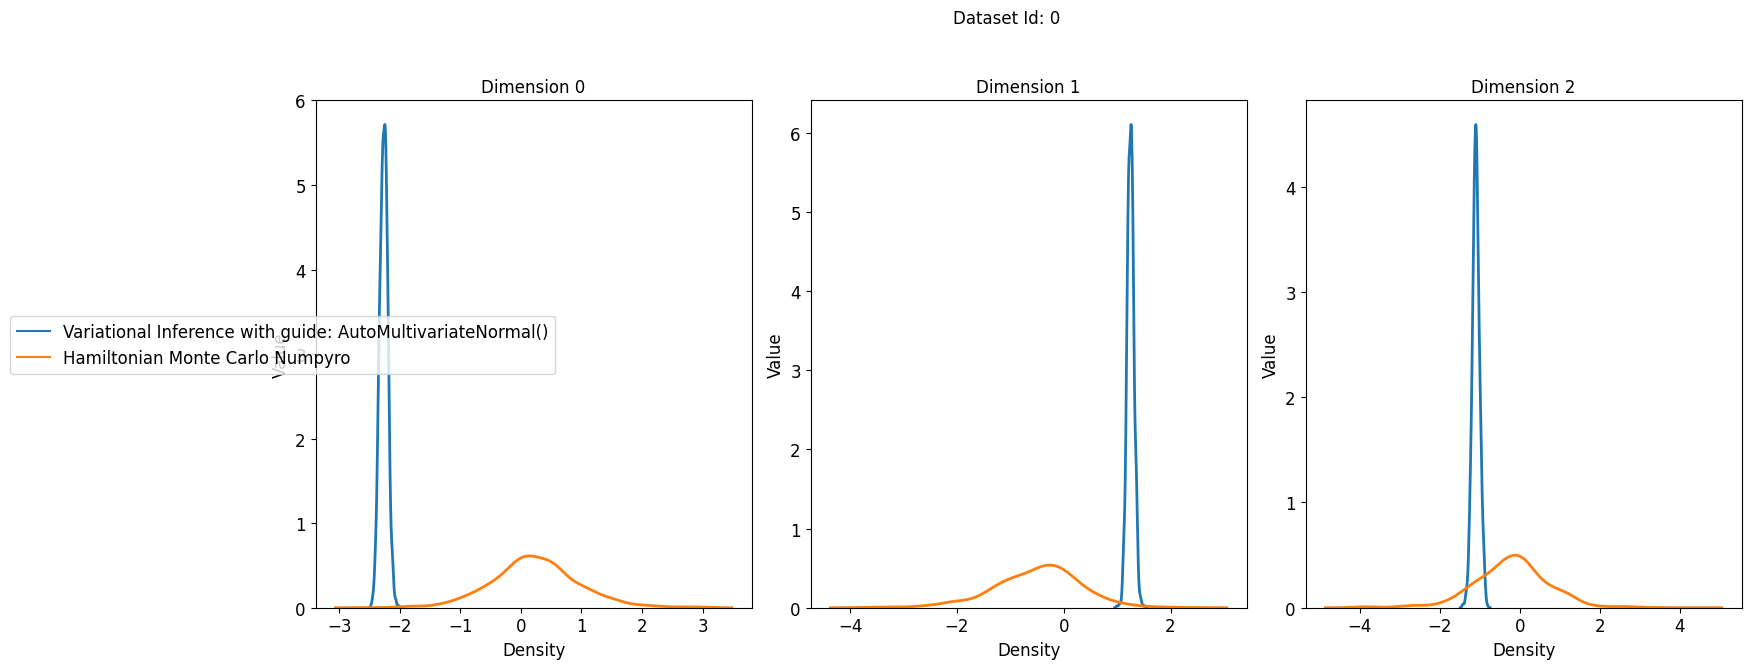

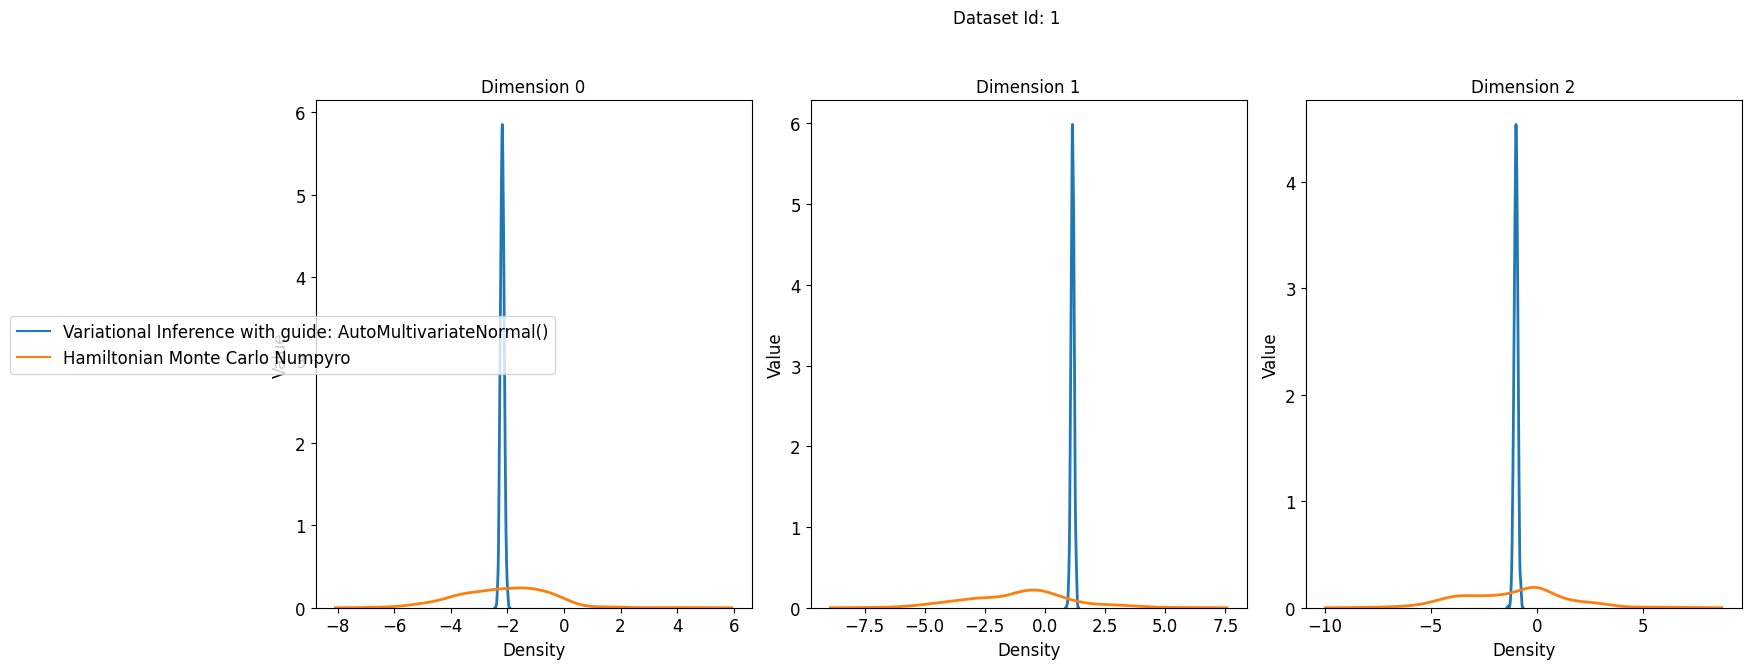

In [63]:
evaluation.plot_results()

In [64]:
from PFNExperiments.Evaluation.RealWorldEvaluation.PreprocessDataset import Preprocessor, PreprocessorClassification

In [65]:
from PFNExperiments.Evaluation.RealWorldEvaluation.Preprocess_multivariate_GMM import Preprocessor_GMM_multivariate
from PFNExperiments.Evaluation.RealWorldEvaluation.GetDataOpenML import GetDataOpenML
getdata = GetDataOpenML(
    preprocessor = Preprocessor_GMM_multivariate(
        N_datapoints = N,
        P_features = P,
        x_mean = 0.0,
        x_var = 1.0,
    ),
    save_path = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/PFNs/Repository/PFNExperiments/Evaluation/RealWorldEvaluation/DatasetsOpenML/Tabular_benchmark_numerical_regression.pkl",
    benchmark_id = 336
)
datasets = getdata.get_data()

In [66]:
from PFNExperiments.Evaluation.RealWorldEvaluation.EvaluateRealWorld import EvaluateRealWorld


eval = EvaluateRealWorld(
    
    posterior_model = full_model,
    evaluation_datasets = datasets,
    comparison_models = [models[1]],
    n_evaluation_cases = 2,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_z_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)

In [67]:
eval.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

............

Sampling posterior:   0%|          | 0/2 [00:15<?, ?it/s]


KeyboardInterrupt: 